<a href="https://colab.research.google.com/github/RyanGarciaLI/AILearn/blob/main/CNN_3000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, ReLU
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K


In [2]:
batch_size = 128
num_classes = 10
epochs = 3000

In [3]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])








In [7]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Streaming output truncated to the last 5000 lines.
469/469 [==============================] - 5s 11ms/step - loss: 0.1264 - accuracy: 0.9625 - val_loss: 0.0574 - val_accuracy: 0.9804
Epoch 502/3000
469/469 [==============================] - 5s 11ms/step - loss: 0.1252 - accuracy: 0.9625 - val_loss: 0.0573 - val_accuracy: 0.9802
Epoch 503/3000
469/469 [==============================] - 6s 12ms/step - loss: 0.1248 - accuracy: 0.9624 - val_loss: 0.0573 - val_accuracy: 0.9805
Epoch 504/3000
469/469 [==============================] - 6s 12ms/step - loss: 0.1237 - accuracy: 0.9628 - val_loss: 0.0572 - val_accuracy: 0.9805
Epoch 505/3000
469/469 [==============================] - 5s 11ms/step - loss: 0.1225 - accuracy: 0.9630 - val_loss: 0.0571 - val_accuracy: 0.9805
Epoch 506/3000
469/469 [==============================] - 6s 12ms/step - loss: 0.1224 - accuracy: 0.9632 - val_loss: 0.0571 - val_accuracy: 0.9805
Epoch 507/3000
469/469 [==============================] - 5s 11ms/step - loss: 0.1

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score

Test loss: 0.023534296080470085
Test accuracy: 0.9927999973297119


[0.023534296080470085, 0.9927999973297119]

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0

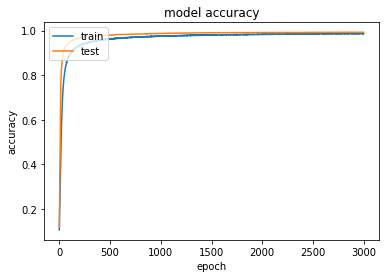

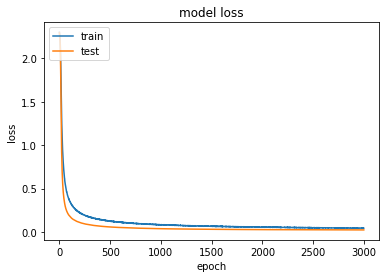

In [10]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()